In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import keras
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

In [3]:
!wget -N https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2019-10-28 17:33:16--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2019-10-28 17:33:16 (24.5 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



In [4]:
#!ls

In [5]:
# load the dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter=',')
data = pd.read_csv('pima-indians-diabetes.data.csv', names=names)

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

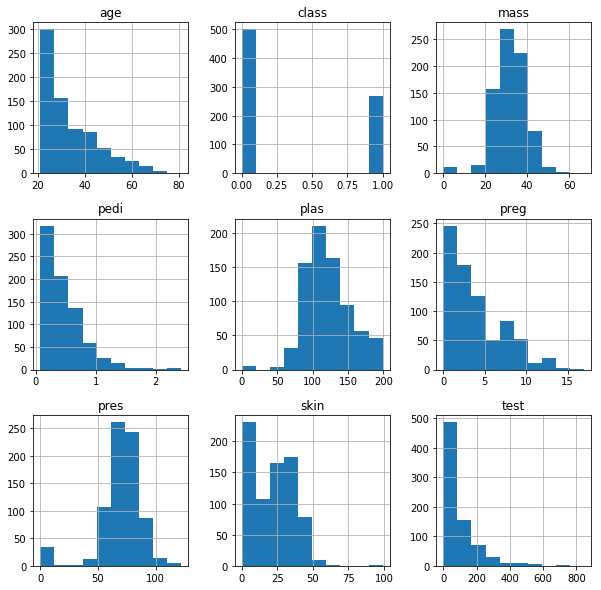

In [6]:
thisplot = data.hist(figsize=(10,10))

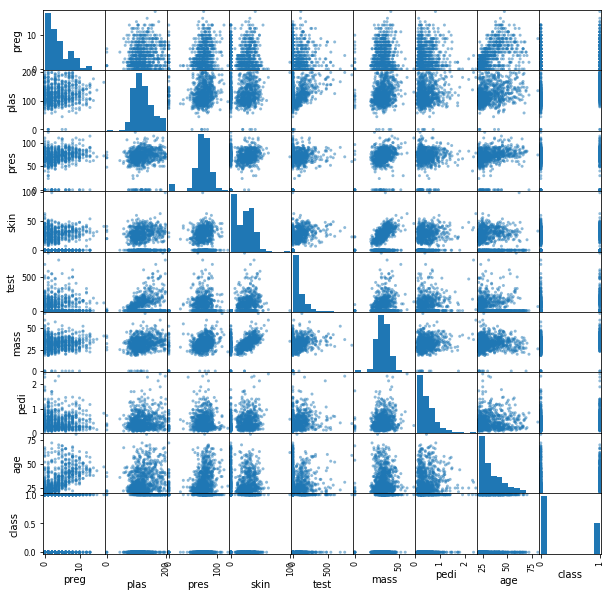

In [7]:
myscatter = scatter_matrix(data, figsize=(10,10))

In [8]:
# define the keras model
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

W1028 17:33:23.838284 140319713302336 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1028 17:33:23.861321 140319713302336 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1028 17:33:23.864318 140319713302336 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



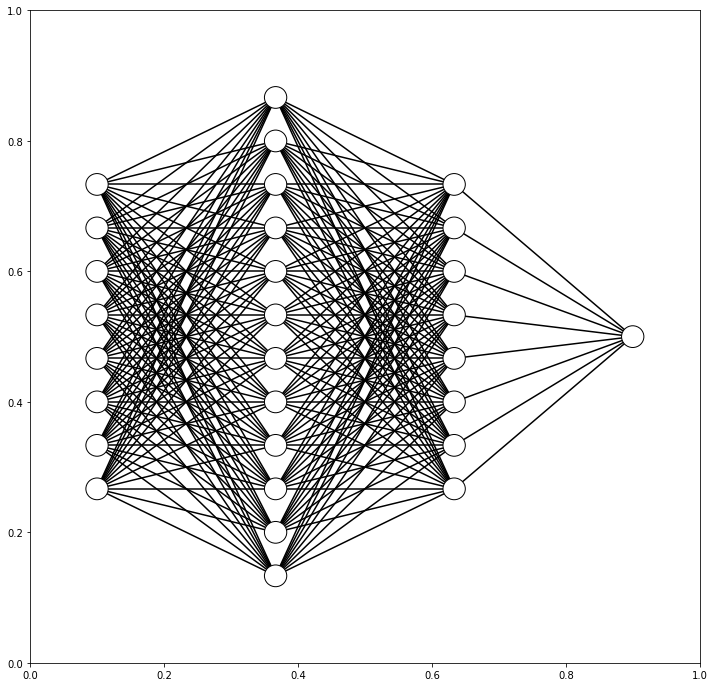

In [9]:
fig = plt.figure(figsize=(12, 12))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [8, 12, 8, 1])

In [10]:
#compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


W1028 17:33:24.609416 140319713302336 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1028 17:33:24.632057 140319713302336 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1028 17:33:24.637389 140319713302336 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=150, batch_size=10)

W1028 17:33:24.824476 140319713302336 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/150
768/768 [==============================] - 1s 2ms/step - loss: 3.5756 - acc: 0.5911
Epoch 2/150
768/768 [==============================] - 0s 169us/step - loss: 1.3447 - acc: 0.6432
Epoch 3/150
768/768 [==============================] - 0s 164us/step - loss: 1.0133 - acc: 0.6419
Epoch 4/150
768/768 [==============================] - 0s 164us/step - loss: 0.9054 - acc: 0.6445
Epoch 5/150
768/768 [==============================] - 0s 166us/step - loss: 0.7789 - acc: 0.6328
Epoch 6/150
768/768 [==============================] - 0s 166us/step - loss: 0.7491 - acc: 0.6406
Epoch 7/150
768/768 [==============================] - 0s 170us/step - loss: 0.6883 - acc: 0.6693
Epoch 8/150
768/768 [==============================] - 0s 168us/step - loss: 0.6888 - acc: 0.6523
Epoch 9/150
768/768 [==============================] - 0s 166us/step - loss: 0.6419 - acc: 0.6823
Epoch 10/150
768/768 [==============================] - 0s 166us/step - loss: 0.6474 - acc: 0.6875
Epoch 11/150
768/768 

768/768 [==============================] - 0s 167us/step - loss: 0.5272 - acc: 0.7422
Epoch 84/150
768/768 [==============================] - 0s 170us/step - loss: 0.5068 - acc: 0.7526
Epoch 85/150
768/768 [==============================] - 0s 164us/step - loss: 0.5193 - acc: 0.7617
Epoch 86/150
768/768 [==============================] - 0s 169us/step - loss: 0.5178 - acc: 0.7344
Epoch 87/150
768/768 [==============================] - 0s 164us/step - loss: 0.5190 - acc: 0.7448
Epoch 88/150
768/768 [==============================] - 0s 170us/step - loss: 0.5301 - acc: 0.7396
Epoch 89/150
768/768 [==============================] - 0s 165us/step - loss: 0.5165 - acc: 0.7630
Epoch 90/150
768/768 [==============================] - 0s 167us/step - loss: 0.5062 - acc: 0.7617
Epoch 91/150
768/768 [==============================] - 0s 171us/step - loss: 0.5243 - acc: 0.7422
Epoch 92/150
768/768 [==============================] - 0s 169us/step - loss: 0.5090 - acc: 0.7500
Epoch 93/150
768/768 [=

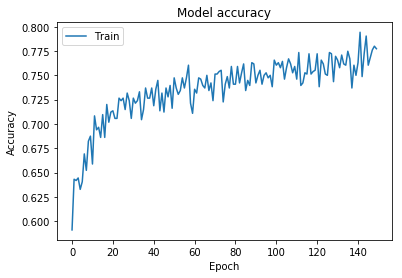

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


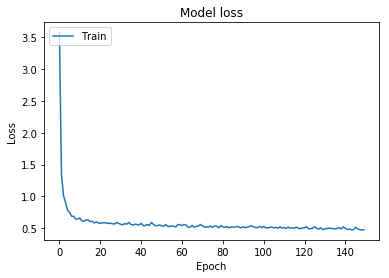

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

768/768 [==============================] - 0s 191us/step
Accuracy: 75.39
